In [1]:
# 기초 라이브러리 import
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 30

# 데이터 불러오기

In [2]:
# 데이터 경로 설정
file_path = os.path.join(os.getcwd(), 'data')
train_origin = pd.read_csv(file_path+'\dataset.csv')
test_origin = pd.read_csv(file_path+'\problem.csv')

In [3]:
train_origin.shape, test_origin.shape

((1340, 24), (130, 23))

In [4]:
train_origin.head()

,Id,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
0,1,8450,Pave,Inside,7,5,2003,2003,856,856,854,1710,2,1,3,1,8,0,Attchd,2003.0,2,548,2008,208500
1,2,9600,Pave,FR2,6,8,1976,1976,1262,1262,0,1262,2,0,3,1,6,1,Attchd,1976.0,2,460,2007,181500
2,3,11250,Pave,Inside,7,5,2001,2002,920,920,866,1786,2,1,3,1,6,1,Attchd,2001.0,2,608,2008,223500
3,4,9550,Pave,Corner,7,5,1915,1970,756,961,756,1717,1,0,3,1,7,1,Detchd,1998.0,3,642,2006,140000
4,5,14260,Pave,FR2,8,5,2000,2000,1145,1145,1053,2198,2,1,4,1,9,1,Attchd,2000.0,3,836,2008,250000


In [5]:
test_origin.head()

,Id,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold
0,1341,11200,Pave,Inside,5,5,1965,1965,1040,1040,0,1040,1,0,3,1,5,0,Detchd,1965,1,384,2008
1,1342,7200,Pave,Corner,5,7,1951,2000,900,900,0,900,1,0,3,1,5,0,Detchd,2005,2,576,2010
2,1343,16905,Pave,Inside,5,6,1959,1959,1350,1328,0,1328,1,1,2,1,5,2,Attchd,1959,1,308,2007
3,1344,9180,Pave,CulDSac,5,7,1983,1983,840,884,0,884,1,0,2,1,5,0,Attchd,1983,2,504,2007
4,1345,7200,Pave,Inside,5,7,1920,1996,530,581,530,1111,1,0,3,1,6,0,Detchd,1935,1,288,2007


In [6]:
# EDA를 위한 데이터 복사
train, test = train_origin.copy(), test_origin.copy()

# EDA

### 사전 작업

In [7]:
# Id column은 필요 없기 때문에 삭제
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [8]:
train.shape, test.shape

((1340, 23), (130, 22))

In [9]:
# 메모리를 효율적으로 사용하기 위한 downcast 함수 정의
def downcast(df, verbose=True):     # verbose 옵션 추가: (True)인 경우 몇 퍼센트 압축됐는지 출력
    start_mem = df.memory_usage().sum() / 1024**2   # 초기 메모리 사용량
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print(f'{(100*(start_mem - end_mem) / start_mem):.1f}% 압축됨')

    return df

In [10]:
downcast(train)

66.8% 압축됨


,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
0,8450,Pave,Inside,7,5,2003,2003,856,856,854,1710,2,1,3,1,8,0,Attchd,2003.0,2,548,2008,208500
1,9600,Pave,FR2,6,8,1976,1976,1262,1262,0,1262,2,0,3,1,6,1,Attchd,1976.0,2,460,2007,181500
2,11250,Pave,Inside,7,5,2001,2002,920,920,866,1786,2,1,3,1,6,1,Attchd,2001.0,2,608,2008,223500
3,9550,Pave,Corner,7,5,1915,1970,756,961,756,1717,1,0,3,1,7,1,Detchd,1998.0,3,642,2006,140000
4,14260,Pave,FR2,8,5,2000,2000,1145,1145,1053,2198,2,1,4,1,9,1,Attchd,2000.0,3,836,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,9042,Pave,Inside,7,9,1941,2006,1152,1188,1152,2340,2,0,4,1,9,2,Attchd,1941.0,1,252,2010,266500
1336,9717,Pave,Inside,5,6,1950,1996,1078,1078,0,1078,1,0,2,1,5,0,Attchd,1950.0,1,240,2010,142125
1337,9937,Pave,Inside,5,6,1965,1965,1256,1256,0,1256,1,1,3,1,6,0,Attchd,1965.0,1,276,2008,147500
1338,9600,Pave,Inside,5,7,1940,1950,728,976,332,1308,1,1,2,1,7,2,Detchd,1940.0,1,256,2009,160000


### 각종 요약 정보

In [11]:
# 요약테이블 정의
def resumetable(data):
    print(f"Dataset Shape: {data.shape}")
    summary = pd.DataFrame(data.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Feature'] = summary['index']
    summary = summary[['Feature','dtypes']]
    summary['결측치'] = data.isnull().sum().values    
    summary['고유값'] = data.nunique().values
    summary['First Value'] = data.loc[0].values
    summary['Second Value'] = data.loc[1].values
    summary['Third Value'] = data.loc[2].values

    return summary

In [12]:
resumetable(train)

Dataset Shape: (1340, 23)


,Feature,dtypes,결측치,고유값,First Value,Second Value,Third Value
0,LotArea,int32,0,991,8450,9600,11250
1,Street,object,0,2,Pave,Pave,Pave
2,LotConfig,object,0,5,Inside,FR2,Inside
3,OverallQual,int8,0,10,7,6,7
4,OverallCond,int8,0,9,5,8,5
5,YearBuilt,int16,0,112,2003,1976,2001
6,YearRemodAdd,int16,0,61,2003,1976,2002
7,TotalBsmtSF,int16,0,684,856,1262,920
8,1stFlrSF,int16,0,713,856,1262,920
9,2ndFlrSF,int16,0,391,854,0,866


> - 일부(3개 정도) object type data가 있다
>   - Street은 고유값이 2개, LotConfig는 5개, GarageType은 6개가 보인다.
> - 결측치가 있는 feature는 2개가 있다.
>   - 각각 73개로 그렇게 많지는 않다. 

### 히트맵

In [13]:
numeric_data = train.select_dtypes(exclude="object")   # 수치형 데이터만 추출

corr_matrix = numeric_data.corr()

In [14]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.792643
GrLivArea       0.699088
GarageCars      0.643402
GarageArea      0.622954
TotalBsmtSF     0.611477
1stFlrSF        0.601466
FullBath        0.568043
YearBuilt       0.539211
TotRmsAbvGrd    0.528775
YearRemodAdd    0.517177
GarageYrBlt     0.495407
Fireplaces      0.462830
2ndFlrSF        0.313262
HalfBath        0.287152
LotArea         0.279809
BedroomAbvGr    0.166689
YrSold         -0.027154
OverallCond    -0.092616
KitchenAbvGr   -0.136361
Name: SalePrice, dtype: float64

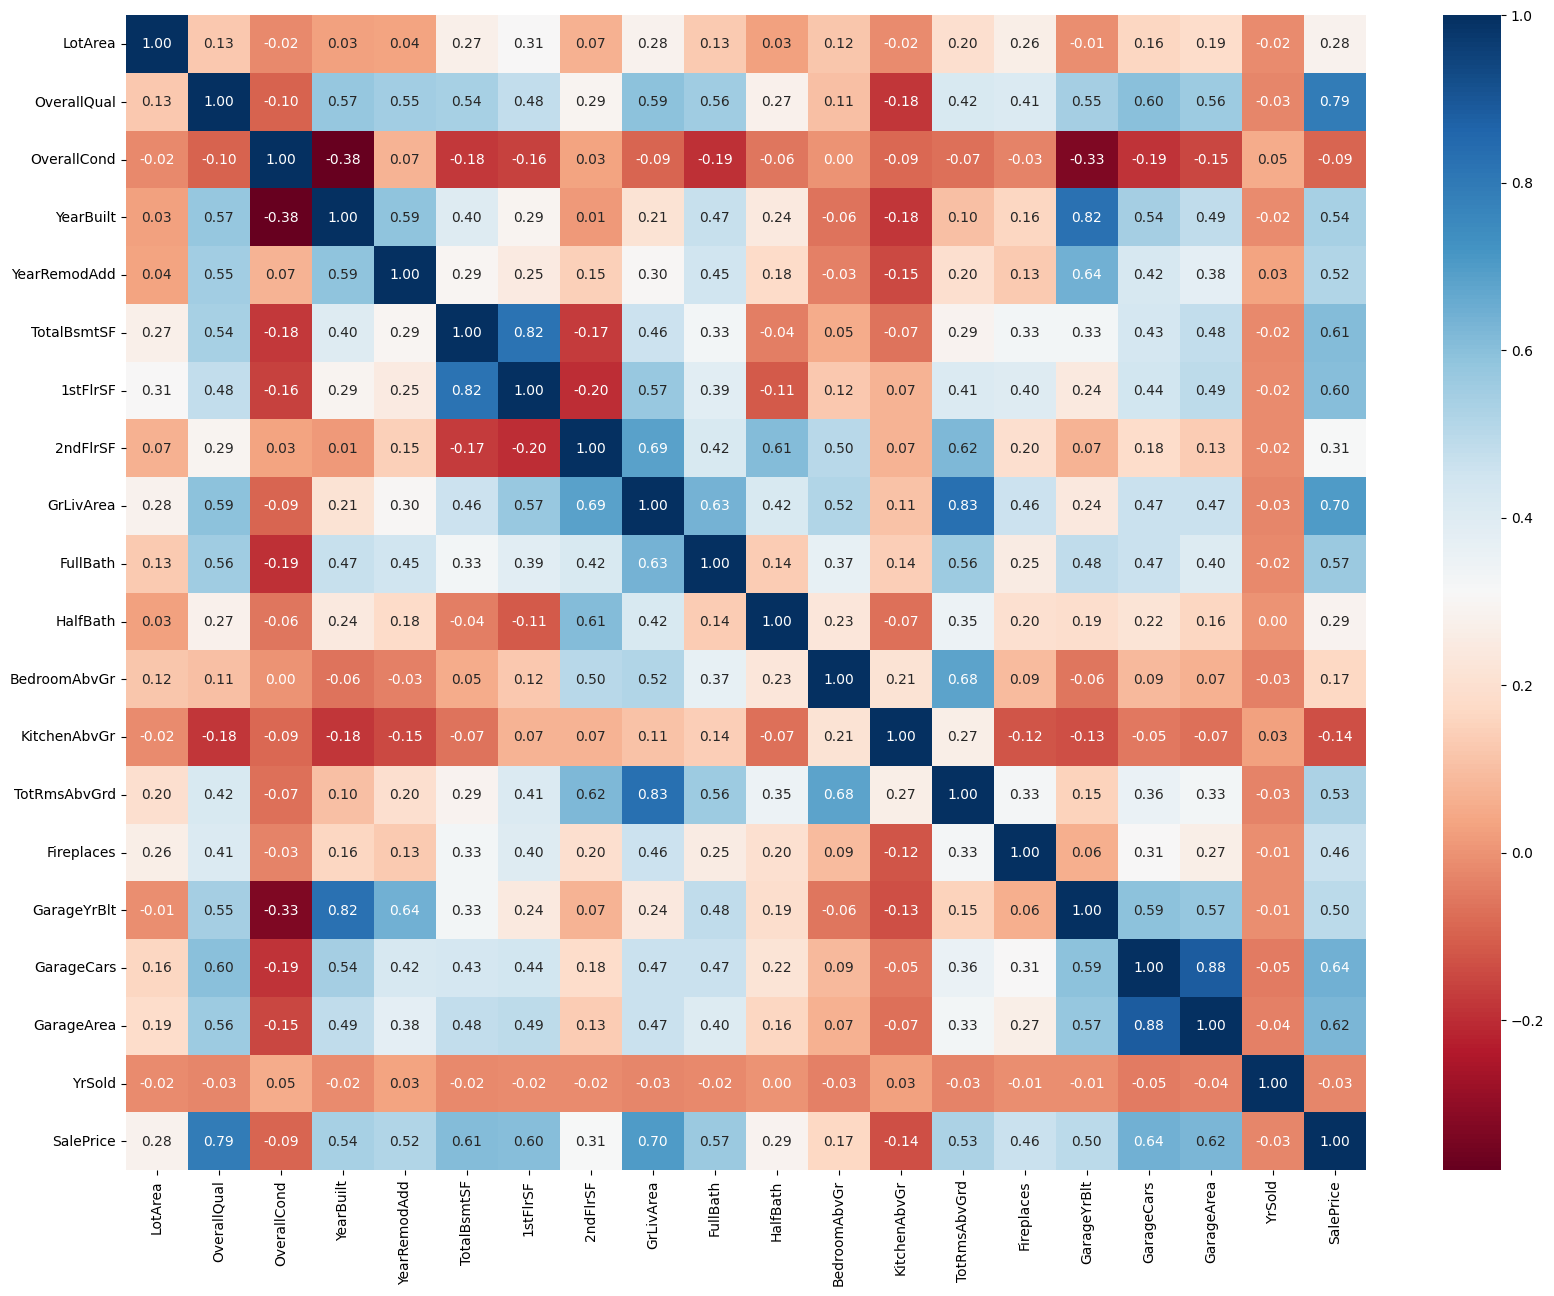

In [15]:
# 상관계수 히트맵
numeric_data = train.select_dtypes(exclude="object")   # 수치형 데이터만 추출
plt.figure(figsize=(20, 15))
#mask = np.zeros_like(numeric_data.corr(), dtype=np.bool_)
#mask[np.triu_indices_from(mask)] = True     # triu_indices_from: 대각선을 기준으로 위쪽 삼각형만 True로 설정
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='RdBu')    # cmap: 색상  # 절반만 표시하고 싶은 경우 mask=mask 옵션 추가
plt.show()

> 강한 상관관계를 보이는 값이 꽤 많이 보인다. 별도의 처리가 필요할 것 같다.
> - 높은 상관관계(0.8 이상)
>   - `GarageArea(차고 평방 피트)`와 `GarageCars(차량 수용 가능 차고 크기)`는 `0.88`의 상관관계<br>
>     :면적에 비례해서 수용가능한 차의 수는 더 많아질 것이므로 GarageCars만 남기자.
>   - `TotRmsAbvGrd(지하층 위의 모든 방 개수)`와 `GrLivArea(지상 거실 면적 평당 피트)`는 `0.83`의 상관관계<br>
>     : 방이 많다는 것은 집이 크다는 의미로 생각이 된다. 이에 따라 거실 면적도 넓은 게 아닐까? GrLivArea만 남기자.
>   - `GarageYrBit(차고 건설 연도)`와 `YearBuilt(최초 건축일)`는 `0.82`의 상관관계<br>
>     : 지은지 오래된 집일수록 차고도 오래되었을 것이다. YearBuilt만 남겨도 될 듯 싶다.
>   - `1stFlrSF(1층 평방 피트)`와 `TotalBsmtSF(지하 총 평방 피트)`는 `0.82`의 상관관계<br>
>     : 1층이 넓다는 것은 집이 크다는 것이니 지하실도 넓다는 의미가 아닐까 생각한다. 1stFlrSF만 남기자.
> - 중간 상관관계(0.6 ~ 0.8)
>   - `SalePrice(target data)`와 `OverallQual(전체적인 재료 및 마감 등급)`은 `0.79`의 상관관계<br>
>     : 재료 및 마감 등급이 좋을수록 집 가격은 높은 게 사실일 것이다.
>   - `SalePrice(target data)`와 `GrLivArea(지상 거실 면적 평방 피트)`는 `0.70`의 상관관계<br>
>     : 거실 면적도 꽤 영향을 주는 거구나.

### 분포 시각화(Feature 한번에)

In [16]:
numeric_data.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'YrSold',
       'SalePrice'],
      dtype='object')

In [17]:
len(numeric_data.columns)

20

In [18]:
train.describe().round(2)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
count,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1259.00,1340.00,1340.00,1340.00,1340.00
mean,10394.69,6.09,5.58,1971.04,1984.71,1053.47,1160.04,343.44,1508.73,1.56,0.38,2.87,1.05,6.52,0.61,1978.36,1.75,468.72,2007.81,179731.31
std,9390.13,1.38,1.11,30.17,20.65,442.47,386.18,433.18,523.05,0.55,0.50,0.82,0.23,1.63,0.64,24.62,0.76,215.18,1.33,78153.43
min,1300.00,1.00,1.00,1872.00,1950.00,0.00,334.00,0.00,334.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,2006.00,34900.00
25%,7500.00,5.00,5.00,1953.75,1966.75,794.00,882.00,0.00,1121.75,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,319.50,2007.00,129500.00
50%,9468.50,6.00,5.00,1972.00,1993.00,986.50,1083.50,0.00,1456.00,2.00,0.00,3.00,1.00,6.00,1.00,1979.00,2.00,476.50,2008.00,161250.00
75%,11515.50,7.00,6.00,2000.00,2004.00,1291.50,1383.00,728.00,1775.25,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,2009.00,213000.00
max,215245.00,10.00,9.00,2010.00,2010.00,6110.00,4692.00,1872.00,5642.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,2010.00,755000.00


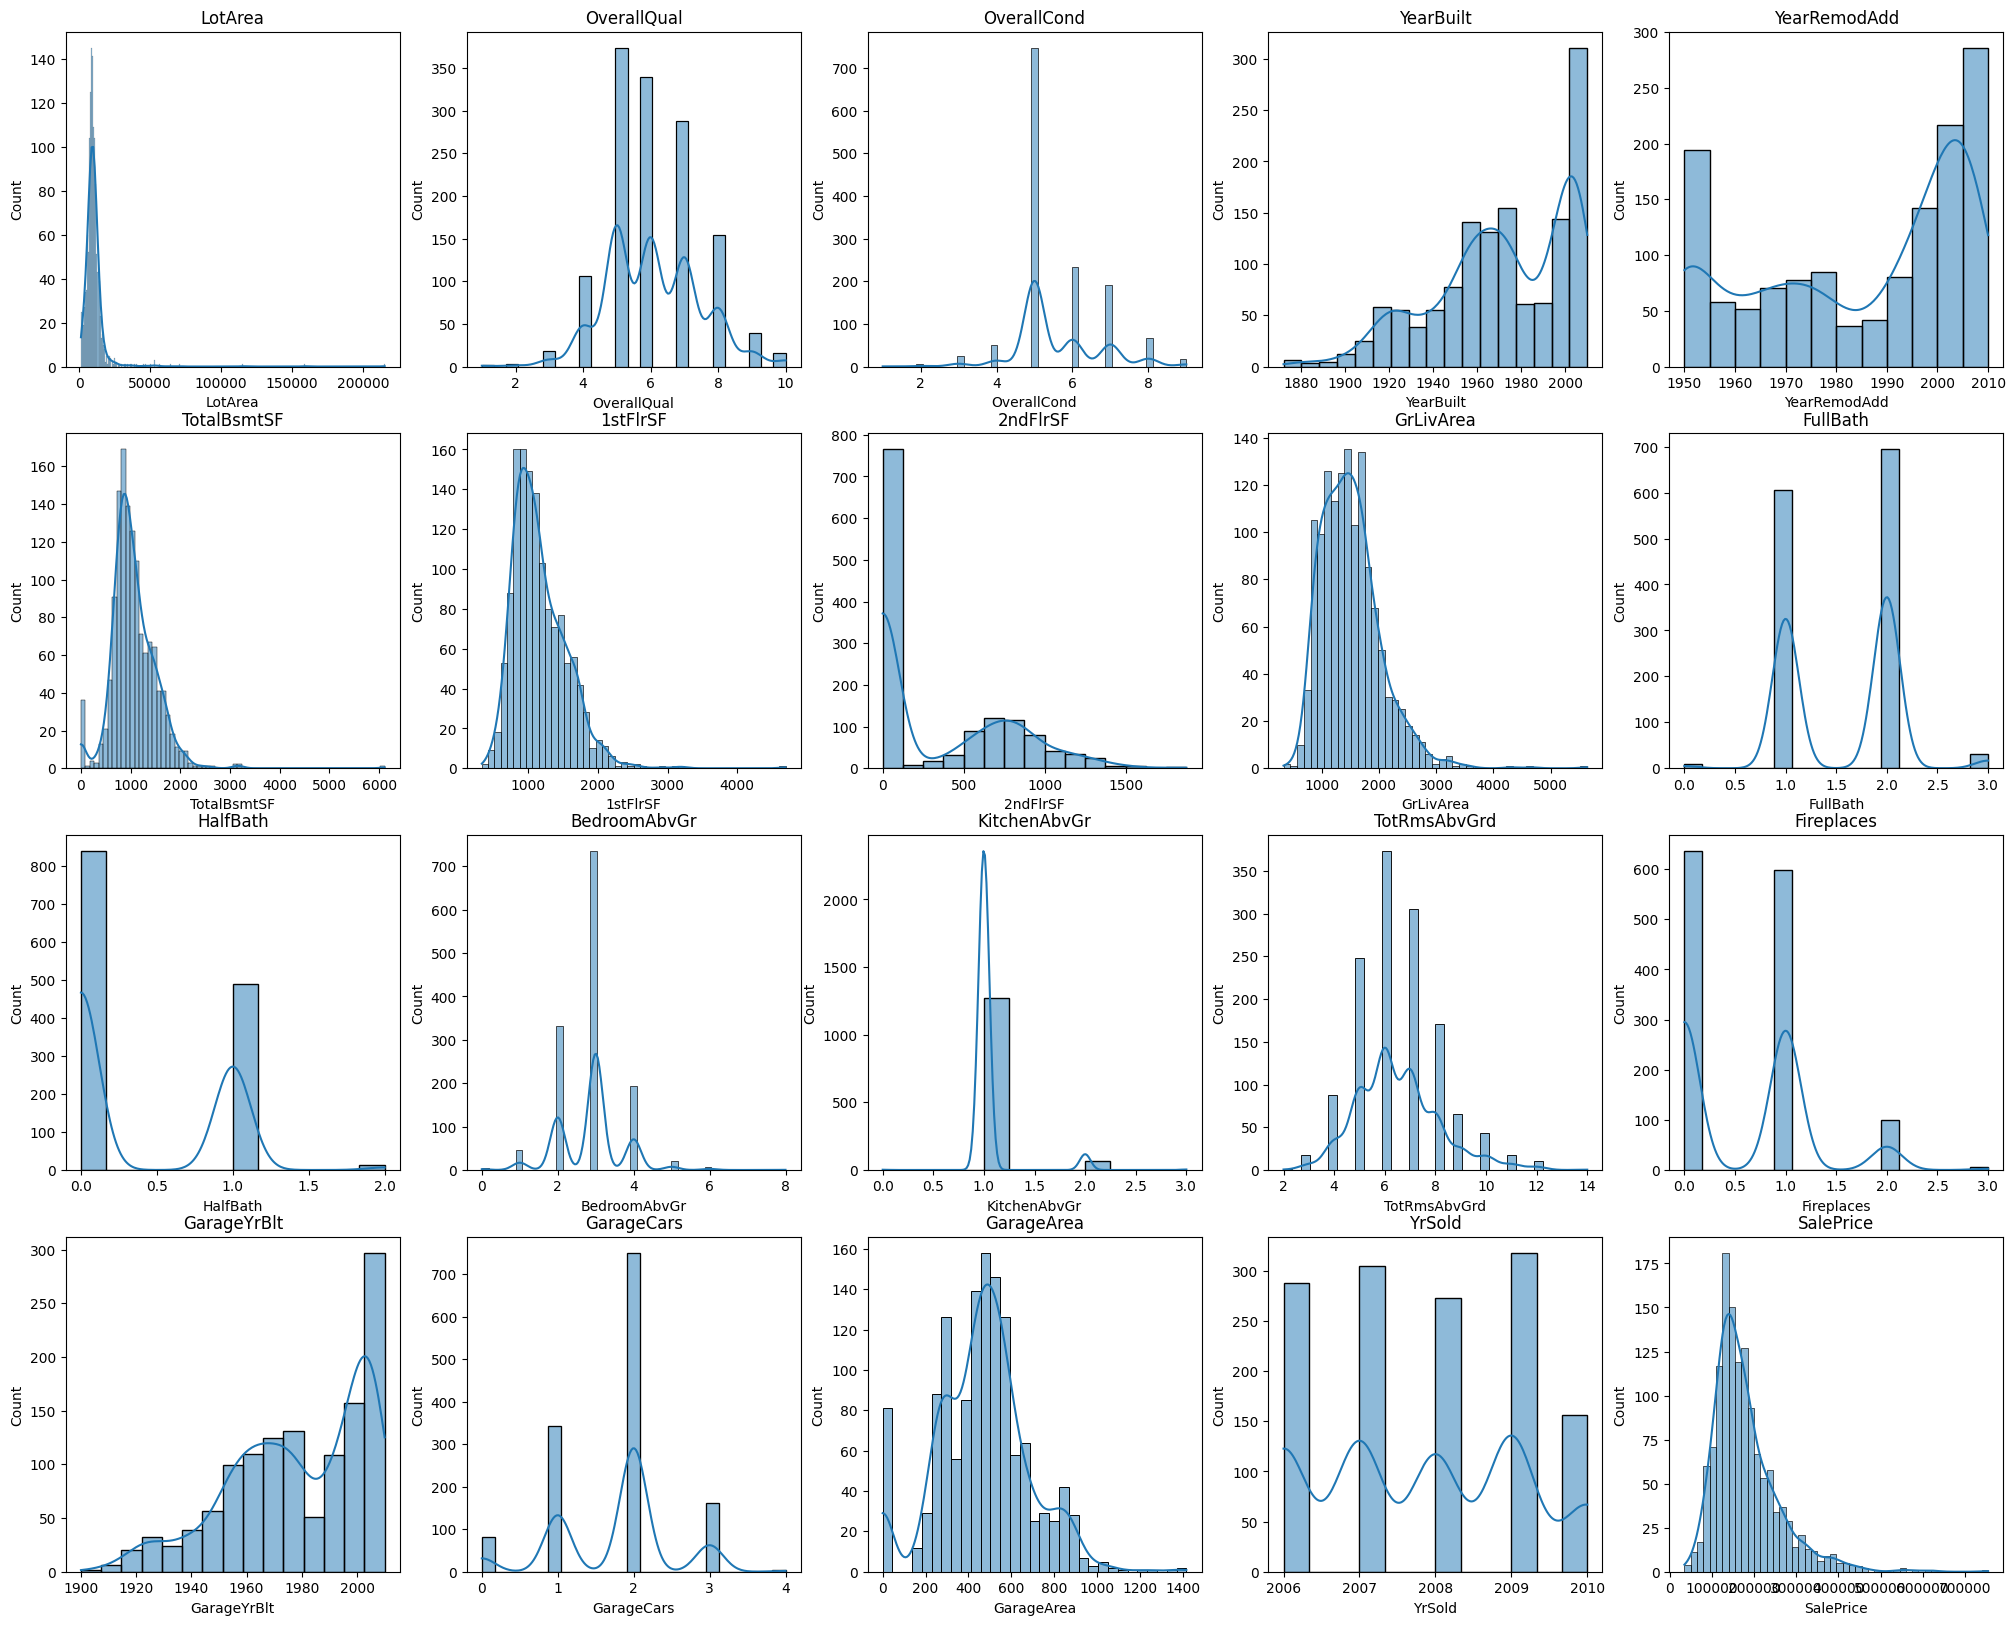

In [19]:
# 모든 수치형 변수의 히스토그램 한 번에 시각화
plt.figure(figsize=(25, 20))
for i, col in enumerate(numeric_data.columns):
    plt.subplot(4, 5, i+1)
    sns.histplot(train[col], kde=True)
    plt.title(col)

### 분포 시각화(특정 feature)

In [20]:
numeric_data.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'YrSold',
       'SalePrice'],
      dtype='object')

#### 1. LotArea

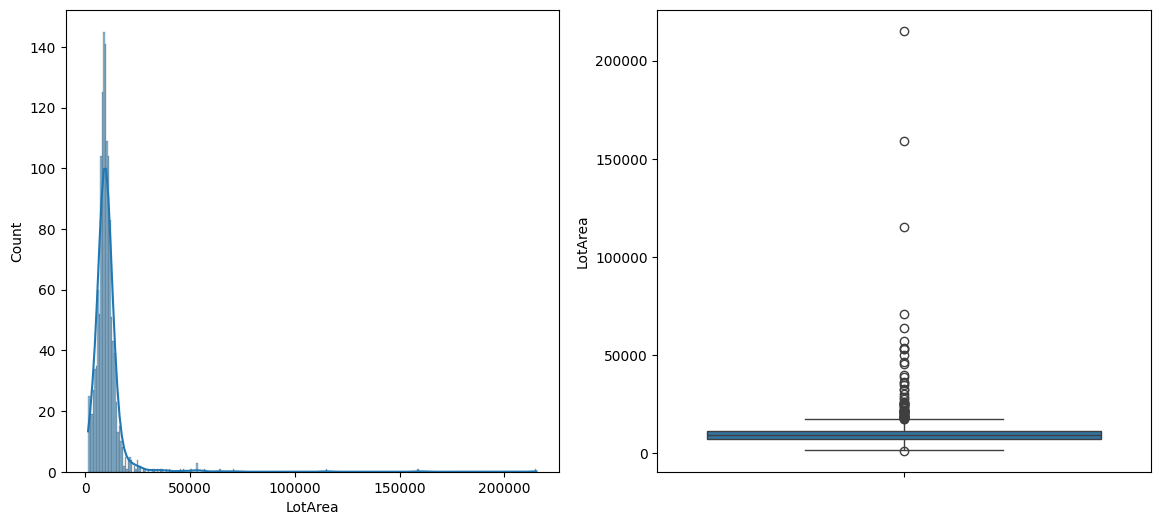

In [28]:
# 히스토그램
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['LotArea'], kde=True)

# 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(train['LotArea'])
plt.show()

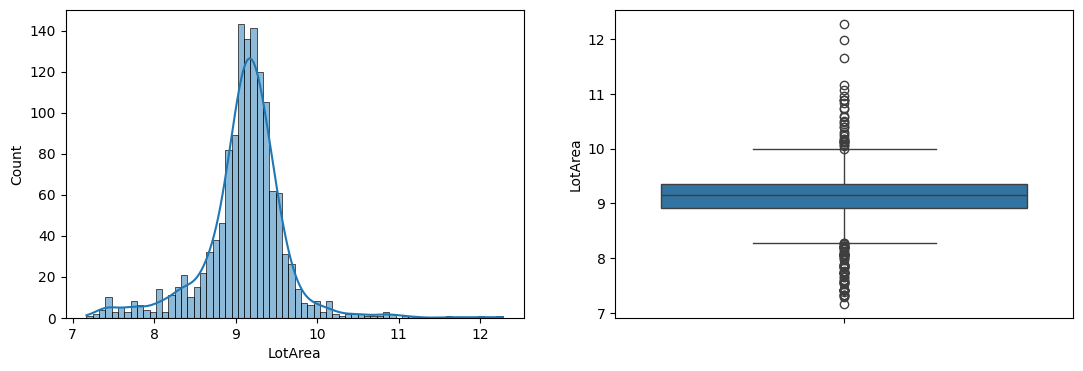

In [22]:
# LotArea의 log 변환
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(train['LotArea']), kde=True)

plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(train['LotArea']))
plt.show()

> LotArea의 분포는 왼쪽으로 굉장히 치우쳐져있다.
> - log 변환을 하면 어느정도 중앙으로 오지만 여전히 이상치는 꽤나 보인다.

### 결측치 처리

In [23]:
train.isnull().sum()

LotArea          0
Street           0
LotConfig        0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageType      81
GarageYrBlt     81
GarageCars       0
GarageArea       0
YrSold           0
SalePrice        0
dtype: int64

In [26]:
train.loc[train.isnull().any(axis=1), 'GarageArea'].value_counts()

GarageArea
0    81
Name: count, dtype: int64

In [28]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [30]:
train['Street'].value_counts()

Street
Pave    1336
Grvl       4
Name: count, dtype: int64

<Axes: xlabel='Street', ylabel='SalePrice'>

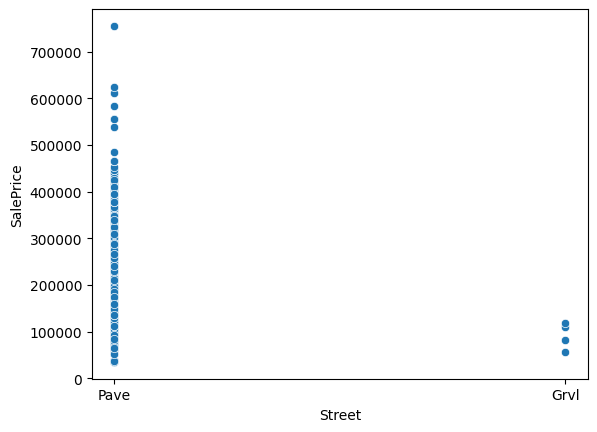

In [32]:
sns.scatterplot(x='Street', y='SalePrice', data=train)

### target과 feature 간의 관계 파악

In [29]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.792643
GrLivArea       0.699088
GarageCars      0.643402
GarageArea      0.622954
TotalBsmtSF     0.611477
1stFlrSF        0.601466
FullBath        0.568043
YearBuilt       0.539211
TotRmsAbvGrd    0.528775
YearRemodAdd    0.517177
GarageYrBlt     0.495407
Fireplaces      0.462830
2ndFlrSF        0.313262
HalfBath        0.287152
LotArea         0.279809
BedroomAbvGr    0.166689
YrSold         -0.027154
OverallCond    -0.092616
KitchenAbvGr   -0.136361
Name: SalePrice, dtype: float64

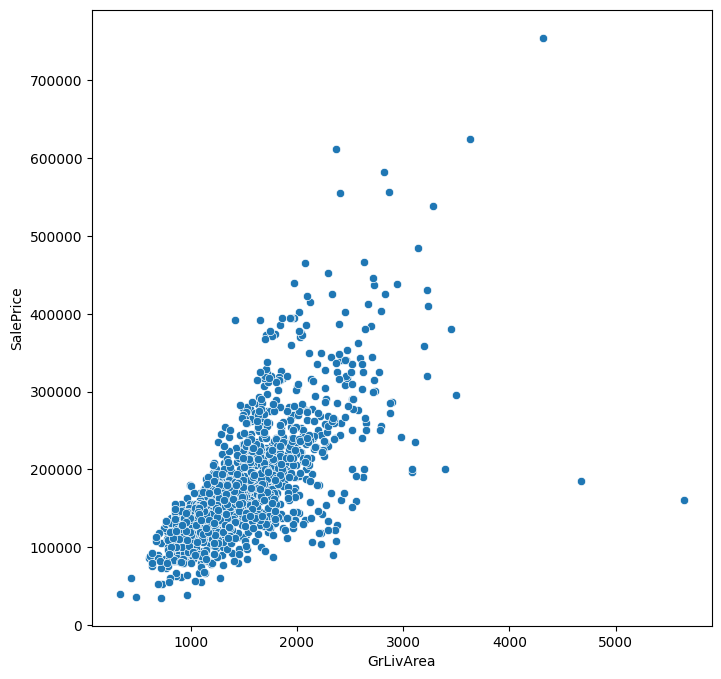

In [30]:
# GrLivArea와 SalePrice scatterplot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice')
plt.show()

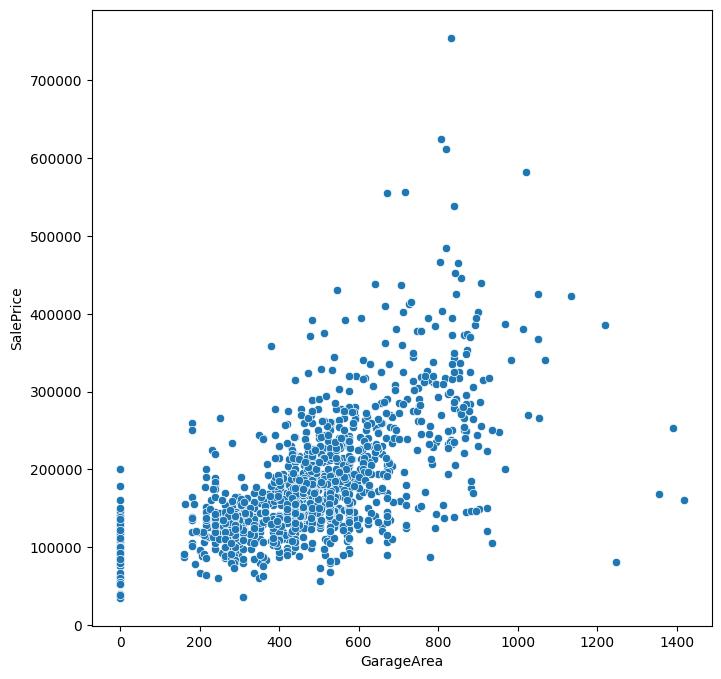

In [31]:
# GrLivArea와 SalePrice scatterplot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=train, x='GarageArea', y='SalePrice')
plt.show()

<Axes: ylabel='SalePrice'>

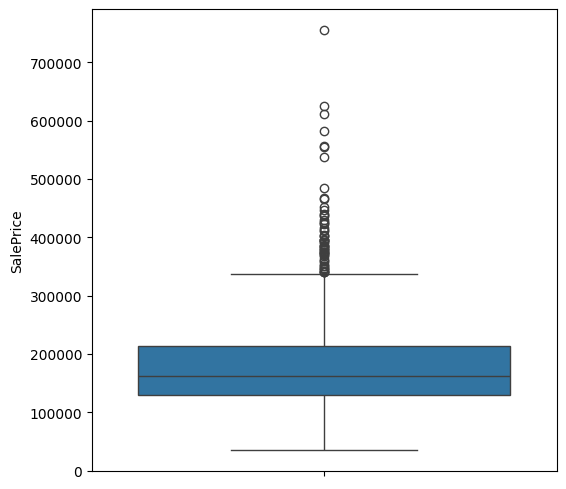

In [32]:
plt.figure(figsize=(6,6))
sns.boxplot(train['SalePrice'])

In [33]:
train[train['SalePrice']<50000]

,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
438,7879,Pave,Inside,4,5,1920,1950,720,720,0,720,1,0,2,1,4,0,Attchd,2005.0,0,0,2009,34900
476,5000,Pave,Inside,1,3,1946,1950,0,334,0,334,1,0,1,1,2,0,Attchd,2005.0,0,0,2007,39300
854,9000,Pave,Inside,2,3,1949,1950,480,480,0,480,0,0,1,1,4,0,Detchd,1958.0,1,308,2006,35311
906,5925,Pave,Inside,3,6,1910,1950,600,600,368,968,1,0,2,1,6,0,Attchd,2005.0,0,0,2009,37900


In [34]:
train[train['GrLivArea']>3300].sort_values('GrLivArea')

,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
578,10896,Pave,Inside,6,7,1914,1995,1440,1440,1440,3395,2,0,8,2,14,0,Attchd,2005.0,0,0,2007,200000
1181,14100,Pave,Inside,8,9,1935,1997,728,1968,1479,3447,3,1,4,1,11,2,BuiltIn,1982.0,3,1014,2008,381000
269,18386,Pave,Inside,7,9,1880,2002,1470,1675,1818,3493,3,0,3,1,10,1,Attchd,2003.0,3,870,2008,295000
1098,35760,Pave,CulDSac,10,5,1995,1996,1930,1831,1796,3627,3,1,4,1,10,1,Attchd,1995.0,3,807,2006,625000
634,21535,Pave,Corner,10,6,1994,1995,2444,2444,1872,4316,3,1,4,1,10,2,Attchd,1994.0,3,832,2007,755000
466,40094,Pave,Inside,10,5,2007,2008,3138,3138,1538,4676,3,1,3,1,11,1,BuiltIn,2007.0,3,884,2007,184750
1211,63887,Pave,Corner,10,5,2008,2008,6110,4692,950,5642,2,1,3,1,12,3,Attchd,2008.0,2,1418,2008,160000


### 파생변수들의 관계 확인

In [35]:
new_data = train.copy()

In [36]:
# 2010년을 기준으로 건물이 지어진 후 지난 시간(연)
new_data['YearBuiltDiff'] = 2010 - new_data['YearBuilt']

# 리모델링 후 지난 시간(연)
new_data['RemodAddDiff'] = 2010 - new_data['YearRemodAdd']

# 욕실 수 합치기
new_data['TotalBath'] = new_data['FullBath'] + new_data['HalfBath']

# 총 면적
new_data['TotalSF'] = new_data['GrLivArea'] + new_data['TotalBsmtSF']

In [37]:
# 2층 여부
new_data['Has2ndFlr'] = new_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

# 지하실 여부
new_data['HasBsmt'] = new_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [38]:
new_data

,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice,YearBuiltDiff,RemodAddDiff,TotalBath,TotalSF,Has2ndFlr,HasBsmt
0,8450,Pave,Inside,7,5,2003,2003,856,856,854,1710,2,1,3,1,8,0,Attchd,2003.0,2,548,2008,208500,7,7,3,2566,1,1
1,9600,Pave,FR2,6,8,1976,1976,1262,1262,0,1262,2,0,3,1,6,1,Attchd,1976.0,2,460,2007,181500,34,34,2,2524,0,1
2,11250,Pave,Inside,7,5,2001,2002,920,920,866,1786,2,1,3,1,6,1,Attchd,2001.0,2,608,2008,223500,9,8,3,2706,1,1
3,9550,Pave,Corner,7,5,1915,1970,756,961,756,1717,1,0,3,1,7,1,Detchd,1998.0,3,642,2006,140000,95,40,1,2473,1,1
4,14260,Pave,FR2,8,5,2000,2000,1145,1145,1053,2198,2,1,4,1,9,1,Attchd,2000.0,3,836,2008,250000,10,10,3,3343,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,9042,Pave,Inside,7,9,1941,2006,1152,1188,1152,2340,2,0,4,1,9,2,Attchd,1941.0,1,252,2010,266500,69,4,2,3492,1,1
1336,9717,Pave,Inside,5,6,1950,1996,1078,1078,0,1078,1,0,2,1,5,0,Attchd,1950.0,1,240,2010,142125,60,14,1,2156,0,1
1337,9937,Pave,Inside,5,6,1965,1965,1256,1256,0,1256,1,1,3,1,6,0,Attchd,1965.0,1,276,2008,147500,45,45,2,2512,0,1
1338,9600,Pave,Inside,5,7,1940,1950,728,976,332,1308,1,1,2,1,7,2,Detchd,1940.0,1,256,2009,160000,70,60,2,2036,1,1


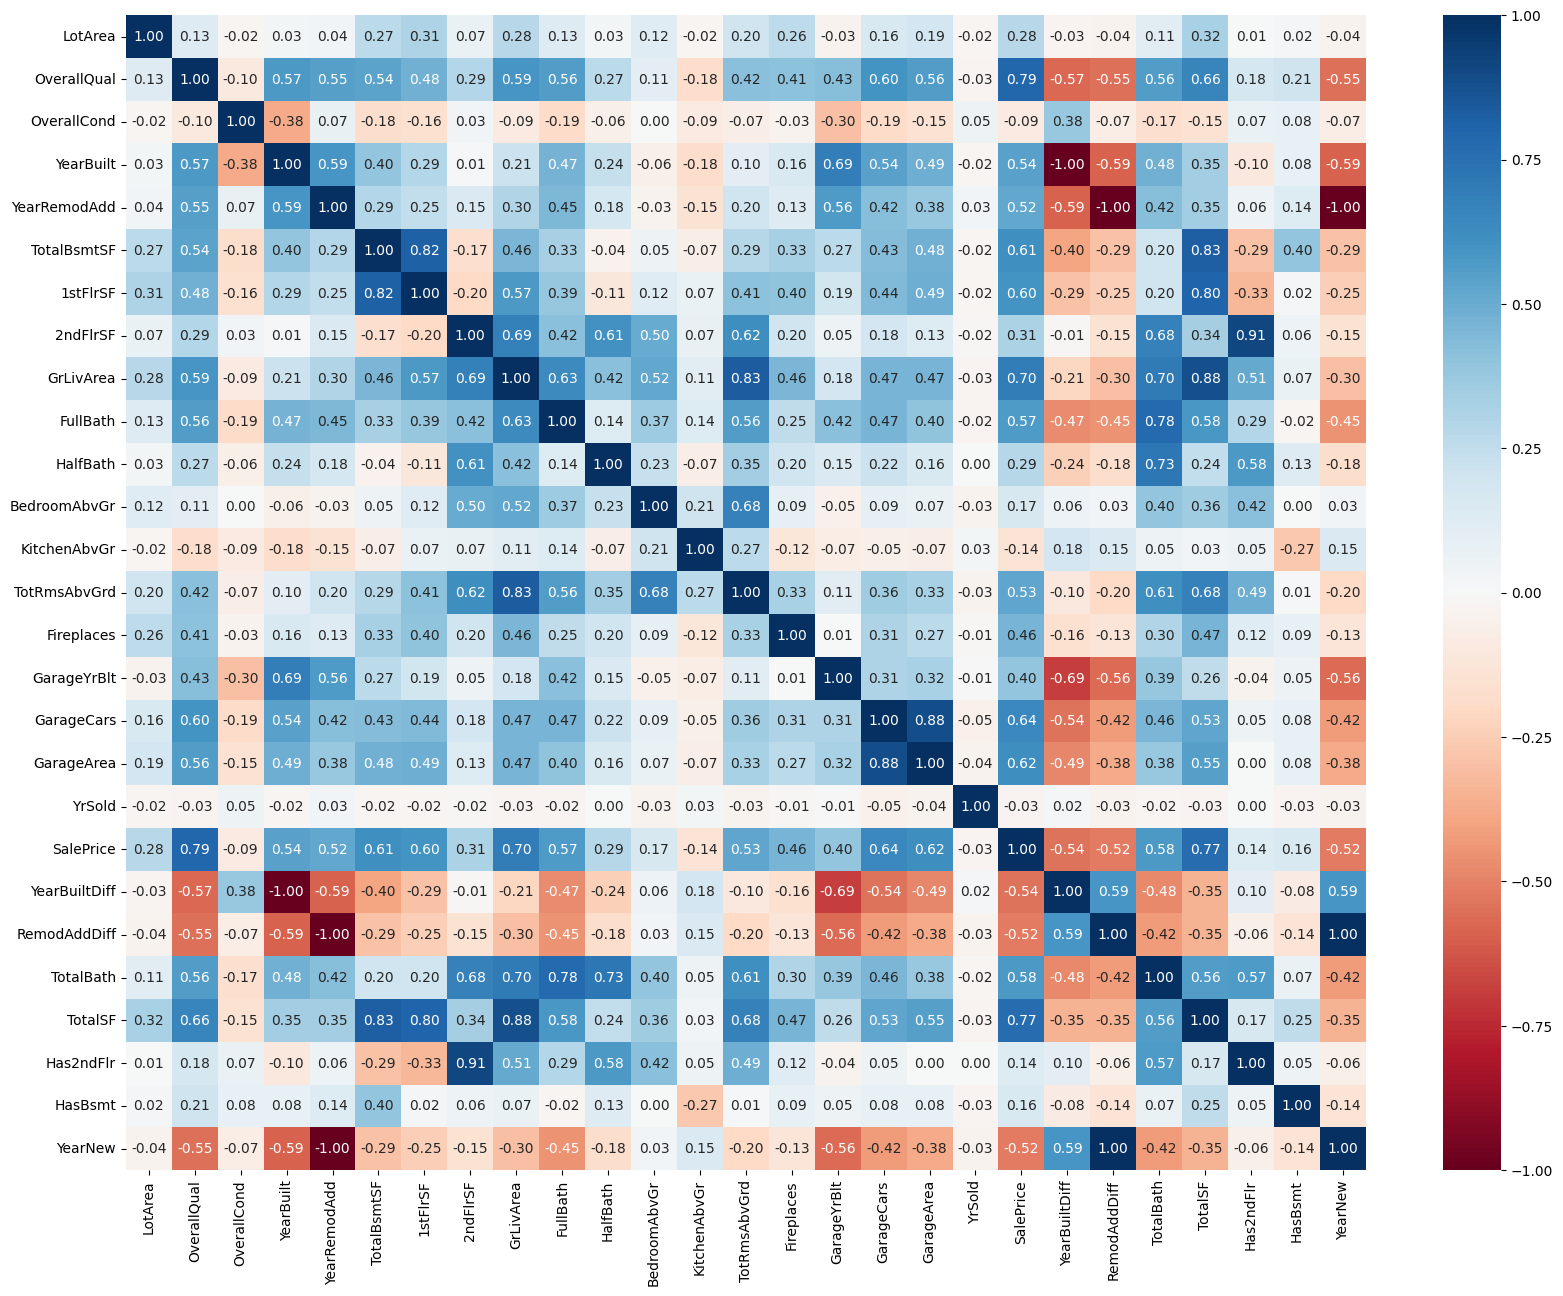

In [41]:
# 상관계수 히트맵
new_numeric_data = new_data.select_dtypes(exclude="object")   # 수치형 데이터만 추출
plt.figure(figsize=(20, 15))
#mask = np.zeros_like(numeric_data.corr(), dtype=np.bool_)
#mask[np.triu_indices_from(mask)] = True     # triu_indices_from: 대각선을 기준으로 위쪽 삼각형만 True로 설정
sns.heatmap(new_numeric_data.corr(), annot=True, fmt='.2f', cmap='RdBu')    # cmap: 색상  # 절반만 표시하고 싶은 경우 mask=mask 옵션 추가
plt.show()

In [45]:
# 만일 YearBuiltDiff가 RemodAddDiff보다 크다면 RemodAddDiff 값 대입
new_data['YearNew'] = new_data.apply(lambda x: x['YearBuiltDiff'] if x['RemodAddDiff'] == x['YearBuiltDiff'] else x['RemodAddDiff'], axis=1)

In [44]:
new_data[new_data['RemodAddDiff'] == new_data['YearBuiltDiff']]

,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice,YearBuiltDiff,RemodAddDiff,TotalBath,TotalSF,Has2ndFlr,HasBsmt,YearNew
0,8450,Pave,Inside,7,5,2003,2003,856,856,854,1710,2,1,3,1,8,0,Attchd,2003.0,2,548,2008,208500,7,7,3,2566,1,1,7
1,9600,Pave,FR2,6,8,1976,1976,1262,1262,0,1262,2,0,3,1,6,1,Attchd,1976.0,2,460,2007,181500,34,34,2,2524,0,1,34
4,14260,Pave,FR2,8,5,2000,2000,1145,1145,1053,2198,2,1,4,1,9,1,Attchd,2000.0,3,836,2008,250000,10,10,3,3343,1,1,10
7,10382,Pave,Corner,7,6,1973,1973,1107,1107,983,2090,2,1,3,1,7,2,Attchd,1973.0,2,484,2009,200000,37,37,3,3197,1,1,37
11,12968,Pave,Inside,5,6,1962,1962,912,912,0,912,1,0,2,1,4,0,Detchd,1962.0,1,352,2008,144000,48,48,1,1824,0,1,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,9000,Pave,FR2,5,5,1974,1974,896,896,896,1792,2,2,4,2,8,0,Attchd,2005.0,0,0,2009,136000,36,36,4,2688,1,1,36
1330,3675,Pave,Inside,5,5,2005,2005,547,1072,0,1072,1,0,2,1,5,0,Basment,2005.0,2,525,2006,145000,5,5,1,1619,0,1,5
1331,17217,Pave,Inside,5,5,2006,2006,1140,1140,0,1140,1,0,3,1,6,0,Attchd,2005.0,0,0,2006,84500,4,4,1,2280,0,1,4
1337,9937,Pave,Inside,5,6,1965,1965,1256,1256,0,1256,1,1,3,1,6,0,Attchd,1965.0,1,276,2008,147500,45,45,2,2512,0,1,45


In [46]:
new_data[new_data['RemodAddDiff'] != new_data['YearBuiltDiff']]

,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice,YearBuiltDiff,RemodAddDiff,TotalBath,TotalSF,Has2ndFlr,HasBsmt,YearNew
2,11250,Pave,Inside,7,5,2001,2002,920,920,866,1786,2,1,3,1,6,1,Attchd,2001.0,2,608,2008,223500,9,8,3,2706,1,1,8
3,9550,Pave,Corner,7,5,1915,1970,756,961,756,1717,1,0,3,1,7,1,Detchd,1998.0,3,642,2006,140000,95,40,1,2473,1,1,40
5,14115,Pave,Inside,5,5,1993,1995,796,796,566,1362,1,1,1,1,5,0,Attchd,1993.0,2,480,2009,143000,17,15,2,2158,1,1,15
6,10084,Pave,Inside,8,5,2004,2005,1686,1694,0,1694,2,0,3,1,7,1,Attchd,2004.0,2,636,2007,307000,6,5,2,3380,0,1,5
8,6120,Pave,Inside,7,5,1931,1950,952,1022,752,1774,2,0,2,2,8,2,Detchd,1931.0,2,468,2008,129900,79,60,2,2726,1,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,7917,Pave,Inside,6,5,1999,2000,953,953,694,1647,2,1,3,1,7,1,Attchd,1999.0,2,460,2007,175000,11,10,3,2600,1,1,10
1334,13175,Pave,Inside,6,6,1978,1988,1542,2073,0,2073,2,0,3,1,7,2,Attchd,1978.0,2,500,2010,210000,32,22,2,3615,0,1,22
1335,9042,Pave,Inside,7,9,1941,2006,1152,1188,1152,2340,2,0,4,1,9,2,Attchd,1941.0,1,252,2010,266500,69,4,2,3492,1,1,4
1336,9717,Pave,Inside,5,6,1950,1996,1078,1078,0,1078,1,0,2,1,5,0,Attchd,1950.0,1,240,2010,142125,60,14,1,2156,0,1,14
